In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import my_modules.data as data
import my_modules.risk as risk

ind = data.get_ind30_vw_returns()
er = risk.annualise_rets(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

# N-Asset Efficient Frontier

_The only thing that needs to be adjusted compared to the two asset is the weighting_

```python
def plot_two_asset_frontier(num_points, ex_return, cov):
  """
  Plots the efficient frontier for a two asset mix
  """
  weights = ??? # minimize_vol(targe_return)
  ret = [returns(w, ex_return) for w in weights]
  vol = [volatility(w, cov) for w in weights]
  frontier = pd.DataFrame({
    'Returns':ret,
    'Volatility':vol
  })
  return frontier.plot.line(x='Volatility', y='Returns', style='.-')


In [6]:
from scipy.optimize import minimize
from my_modules import portfolio
import numpy as np

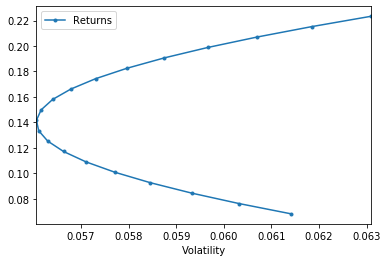

In [5]:
l=['Games', 'Fin']
portfolio.plot_two_asset_frontier(20, er[l], cov.loc[l,l])

In [25]:
 # How can I figure out the weight of the portfolio to give a certain return with the lowest volatility
# Applying this to all the weight vectors will give us the curve
def minimise_vol(target_return, er, cov):
    """
    target_return -> weight vector (W)
    """
    num_assets = er.shape[0]
    init_guess = np.repeat(1/num_assets, num_assets)
    
    # Constraint 1:
    # need a sequence of bounds for every weight vector
    # it is constrained to not use leverage or go short
    bounds = ((0.0, 1.0),) * num_assets # n tuples of a tuple
    
    # Constraint 2:
    # The portfolio for the target_return should have the lowest volatility
    return_is_target = {
        'type': 'eq', #equality
        'args': (er,),
        'fun': lambda weights, er: target_return - portfolio.returns(weights,er)
    }
    
    # Constraint 3:
    # The weights sum to 1
    weight_sum_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    results = minimize(portfolio.volatility, init_guess,
                      args=(cov,), method='SLSQP',
                      options={'disp': False},
                       constraints=(return_is_target, weight_sum_1),
                       bounds=bounds
                      )
    return results.x
    

In [27]:
# Weighting for point in the graph touching y axis
w_15 = minimise_vol(0.15, er[l], cov.loc[l,l])

# Should be around 0.056
vol_15 = portfolio.volatility(w_15,cov.loc[l,l])
vol_15

0.056163669406706564

In [30]:
w_15 = portfolio.minimise_vol(0.15, er[l], cov.loc[l,l])

vol_15 = portfolio.volatility(w_15, cov.loc[l,l])
vol_15

0.056163669406706564

### Now to plot it...
```python
def plot_two_asset_frontier(num_points, ex_return, cov):
  """
  Plots the efficient frontier for a two asset mix
  """
  if ex_return.shape[0] != 2 or cov.shape[0] != 2:
    raise ValueError('Only two assets can be used')
    
  weights = # replace with our optimal weights in form optiomal_weights(n_points, er, cov)
  ret = [returns(w, ex_return) for w in weights]
  vol = [volatility(w, cov) for w in weights]
  frontier = pd.DataFrame({
    'Returns':ret,
    'Volatility':vol
  })
  return frontier.plot.line(x='Volatility', y='Returns', style='.-')


In [41]:
import pandas as pd

def optimal_weights(n_points, ex_return, cov):
    # need to generate a list of target returns to send to optimiser
    target_rs = np.linspace(ex_return.min(), ex_return.max())
    weights = [portfolio.minimise_vol(target_rt, ex_return, cov) for target_rt in target_rs]
    return weights

def plot_n_asset_frontier(num_points, ex_return, cov):
  """
  Plots the efficient frontier for an n asset mix
  """
  weights = optimal_weights(num_points, ex_return, cov)
  rets = [portfolio.returns(w, ex_return) for w in weights]
  vol = [portfolio.volatility(w, cov) for w in weights]
  frontier = pd.DataFrame({
    'Returns':rets,
    'Volatility':vol
  })
  return frontier.plot.line(x='Volatility', y='Returns', style='.-')

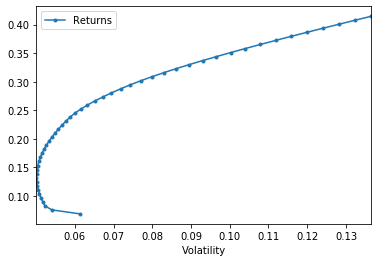

In [42]:
l=['Smoke', 'Fin', 'Games', 'Coal']
plot_n_asset_frontier(25, er[l], cov.loc[l,l])

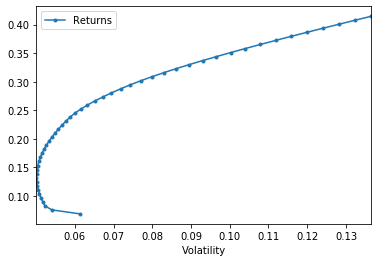

In [44]:
portfolio.plot_n_asset_frontier(25, er[l], cov.loc[l,l])

In [45]:
l

['Smoke', 'Fin', 'Games', 'Coal']

In [46]:
mix_15 = portfolio.minimise_vol(0.15, er[l], cov.loc[l,l])
mix_15

array([0.24152012, 0.27457601, 0.39842497, 0.0854789 ])

In [47]:
mix_12 = portfolio.minimise_vol(0.12, er[l], cov.loc[l,l])
mix_12

array([0.25910954, 0.16006663, 0.53266225, 0.04816157])

In [59]:
import matplotlib.pyplot as plt
n = len(l)

x_axis = np.arrange(n)
width = 0.3

# TODO adapt answer from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars 
# to show the % of the porfolio in each asset at a given return level with min vol
fig = plt.figure()

dist = '1' * n
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
ax = plt.subplot(dist)

'1111'